In [1]:
import sys
import time
import math
sys.path.insert(0, r'/home/danis/work/python_works/gamma_4/Scripts')
sys.path.insert(0, r'D:\Учеба\Практика\Диплом\gamma_4\Scripts')
import numpy as np
import pandas as pd
from materials import*
import matplotlib.pyplot as plt

Минимальная энергия: 1e-3
windows (w) or linux (l): l


Параметры пучков и спектры

In [3]:
linspace1 = np.linspace(0.035, 0.1, 25, dtype=np.float32)
linspace2 = np.geomspace(0.11, 3, 25, dtype=np.float32)

beams_energyes = []
beams_energyes.extend(linspace1)
beams_energyes.extend(linspace2)

In [4]:
m = 70
target = R(Material(m), 0.01)

brems = [target.brem(beams_energy) for beams_energy in beams_energyes]
brems_e = [brem * en for brem in brems]

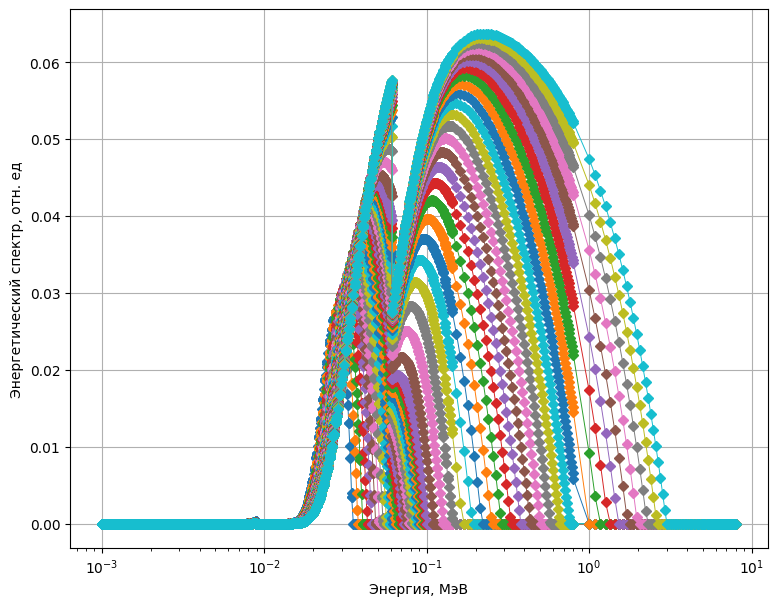

In [5]:
fig, ax = plt.subplots(figsize=(9, 7))

for br in brems_e:
    ax.plot(en, br, ls='-', marker='D', lw='0.7', ms=5)

# настройки графика
ax.set_xlabel('Энергия, МэВ', fontsize=10)
ax.set_ylabel('Энергетический спектр, отн. ед', fontsize=10)
ax.tick_params(axis='both', labelsize=10)

ax.set_xscale('log')
# ax.set_yscale('log')
# ax.set_xlim(1e-3, 0.1e0)
# ax.set_ylim(1e-7, 1.2)

ax.grid(True)

# fig.savefig('Тормозной спектр.jpg', bbox_inches='tight')

Номер первого канала и К-скачки

In [6]:
n = 11

In [7]:
# Индексы К скачков
EDGE = []
for i in range(1, len(en)):
    if en[i - 1] == en[i]:
        EDGE.append(i - 1)

In [8]:
EDGE.remove(EDGE[EDGE.index(Material(m).k_index())])

Уровни пропускания в К-крае

In [9]:
linspace3 = np.linspace(0.001, 0.9, 101)
for i, val in enumerate(linspace3):
    linspace3[i] = round(val, 5)
    
edge_max_values = []
edge_max_values.extend(linspace3)

Спектральные характеристики чувствительности каналов

In [10]:
edge_thiknesses = [[Material(i).lt(j) for i in range(n, 101)] for j in edge_max_values]

In [11]:
edge_regions = [[R(Material(i+n), edge_thiknesses[j][i]) for i in range(0, len(edge_thiknesses[j]))] for j in range(len(edge_thiknesses))]
resp_edges = [[val.f() for val in edge_regions[j]] for j in range(len(edge_regions))]

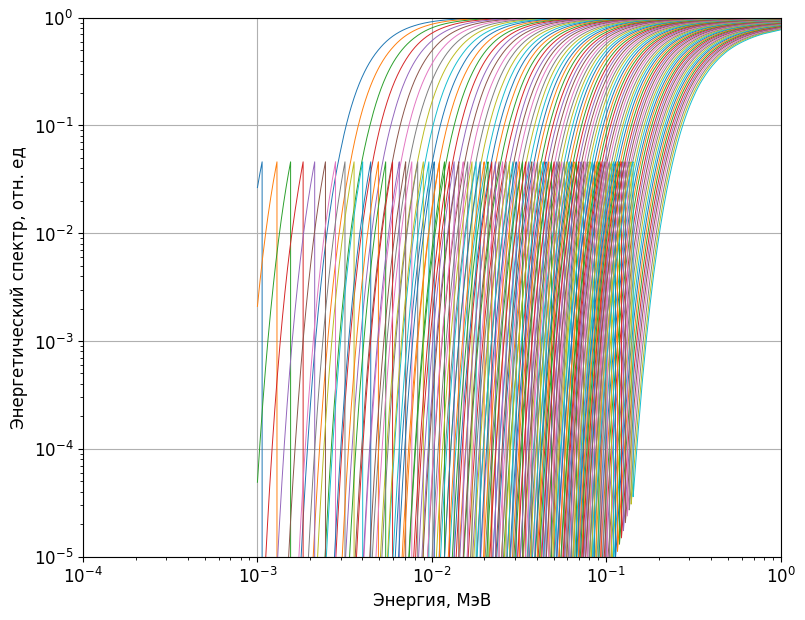

In [12]:
fig, ax = plt.subplots(figsize=(9, 7))

for i in resp_edges[5]:
    ax.plot(en, i, ls='-', lw='0.7', ms=5)

# настройки графика
ax.set_xlabel('Энергия, МэВ', fontsize=12)
ax.set_ylabel('Энергетический спектр, отн. ед', fontsize=12)
ax.tick_params(axis='both', labelsize=12)
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(1e-4, 1e0)
ax.set_ylim(1e-5, 1e0)
ax.grid(True)

Матрицы задач

In [13]:
from garipov_deconvolution import get_coeff_simpson

In [14]:
Matrixs = []

start_time = time.time()

for i in range(len(resp_edges)):
    print(f'({i}), время: {round(time.time() - start_time, 5)} секунд')
    matrix = []
    
    for response in resp_edges[i]:
        matrix.append(get_coeff_simpson(response, en, EDGE)[0])
    
    Matrixs.append(matrix)

(0), время: 0.00019 секунд
(1), время: 5.83718 секунд
(2), время: 11.13689 секунд
(3), время: 16.10018 секунд
(4), время: 21.40353 секунд
(5), время: 27.04416 секунд
(6), время: 31.91326 секунд
(7), время: 36.96982 секунд
(8), время: 42.16207 секунд
(9), время: 45.98621 секунд
(10), время: 51.3631 секунд
(11), время: 56.74275 секунд
(12), время: 62.66531 секунд
(13), время: 68.5622 секунд
(14), время: 74.41814 секунд
(15), время: 80.24088 секунд
(16), время: 86.14527 секунд
(17), время: 91.75963 секунд
(18), время: 95.72759 секунд
(19), время: 98.37843 секунд
(20), время: 104.27105 секунд
(21), время: 107.22808 секунд
(22), время: 110.76296 секунд
(23), время: 114.60145 секунд
(24), время: 119.6169 секунд
(25), время: 124.85426 секунд
(26), время: 130.77059 секунд
(27), время: 134.06637 секунд
(28), время: 137.62992 секунд
(29), время: 141.98932 секунд
(30), время: 146.34846 секунд
(31), время: 152.07473 секунд
(32), время: 157.23112 секунд
(33), время: 162.60576 секунд
(34), время: 16

Сигналы измерительных каналов

In [15]:
new_en = get_coeff_simpson(resp_edges[0][0], en, EDGE)[1]

In [16]:
def signals_from_one_spectrum(spectrum):
    
    start_time = time.time()
    signals_simpson = []
    
    # для каждой матрицы
    for i, matrix in enumerate(Matrixs):
        print(f'({i}), время: {round(time.time() - start_time, 5)} секунд')
        
        # сигналы для каждой задачи
        signals = []
        
        # для каждой строки в матрице
        for row in matrix:
            # значение одного сигнала
            signal = sum(row * np.interp(new_en, en, spectrum))
            signals.append(signal)
            
        signals_simpson.append(signals)
        
    return signals_simpson

Сигналы для каждого спектра

In [17]:
spectrums_signals = []

for spectrum in brems_e:
    spectrums_signals.append(signals_from_one_spectrum(spectrum))

(0), время: 0.0 секунд
(1), время: 0.11874 секунд
(2), время: 0.23704 секунд
(3), время: 0.29712 секунд
(4), время: 0.36794 секунд
(5), время: 0.50696 секунд
(6), время: 0.64334 секунд
(7), время: 0.7768 секунд
(8), время: 0.8721 секунд
(9), время: 0.93159 секунд
(10), время: 1.01277 секунд
(11), время: 1.15124 секунд
(12), время: 1.28728 секунд
(13), время: 1.41664 секунд
(14), время: 1.49666 секунд
(15), время: 1.59169 секунд
(16), время: 1.65059 секунд
(17), время: 1.71545 секунд
(18), время: 1.84748 секунд
(19), время: 1.96922 секунд
(20), время: 2.09136 секунд
(21), время: 2.14864 секунд
(22), время: 2.24678 секунд
(23), время: 2.35754 секунд
(24), время: 2.41508 секунд
(25), время: 2.48036 секунд
(26), время: 2.54091 секунд
(27), время: 2.60909 секунд
(28), время: 2.74126 секунд
(29), время: 2.87471 секунд
(30), время: 2.95721 секунд
(31), время: 3.01659 секунд
(32), время: 3.1402 секунд
(33), время: 3.26564 секунд
(34), время: 3.37825 секунд
(35), время: 3.43628 секунд
(36), вре

(96), время: 9.08344 секунд
(97), время: 9.17042 секунд
(98), время: 9.29829 секунд
(99), время: 9.43484 секунд
(100), время: 9.51908 секунд
(0), время: 0.0 секунд
(1), время: 0.07483 секунд
(2), время: 0.21676 секунд
(3), время: 0.34623 секунд
(4), время: 0.47231 секунд
(5), время: 0.53108 секунд
(6), время: 0.59008 секунд
(7), время: 0.70763 секунд
(8), время: 0.83793 секунд
(9), время: 0.93986 секунд
(10), время: 0.99846 секунд
(11), время: 1.08503 секунд
(12), время: 1.21744 секунд
(13), время: 1.34721 секунд
(14), время: 1.4051 секунд
(15), время: 1.46832 секунд
(16), время: 1.57398 секунд
(17), время: 1.70547 секунд
(18), время: 1.83895 секунд
(19), время: 1.96661 секунд
(20), время: 2.05128 секунд
(21), время: 2.1696 секунд
(22), время: 2.23467 секунд
(23), время: 2.32699 секунд
(24), время: 2.419 секунд
(25), время: 2.50711 секунд
(26), время: 2.63519 секунд
(27), время: 2.72992 секунд
(28), время: 2.78652 секунд
(29), время: 2.84798 секунд
(30), время: 2.93273 секунд
(31), вре

(88), время: 8.09658 секунд
(89), время: 8.23414 секунд
(90), время: 8.30397 секунд
(91), время: 8.36189 секунд
(92), время: 8.42104 секунд
(93), время: 8.55628 секунд
(94), время: 8.68378 секунд
(95), время: 8.81746 секунд
(96), время: 8.92951 секунд
(97), время: 8.98745 секунд
(98), время: 9.08468 секунд
(99), время: 9.18679 секунд
(100), время: 9.24393 секунд
(0), время: 1e-05 секунд
(1), время: 0.13581 секунд
(2), время: 0.26987 секунд
(3), время: 0.34099 секунд
(4), время: 0.46415 секунд
(5), время: 0.53046 секунд
(6), время: 0.6566 секунд
(7), время: 0.79187 секунд
(8), время: 0.92172 секунд
(9), время: 1.05359 секунд
(10), время: 1.15708 секунд
(11), время: 1.21631 секунд
(12), время: 1.30445 секунд
(13), время: 1.37276 секунд
(14), время: 1.43058 секунд
(15), время: 1.51174 секунд
(16), время: 1.60515 секунд
(17), время: 1.66245 секунд
(18), время: 1.72127 секунд
(19), время: 1.83144 секунд
(20), время: 1.88938 секунд
(21), время: 1.95111 секунд
(22), время: 2.05365 секунд
(23)

(80), время: 7.2456 секунд
(81), время: 7.34245 секунд
(82), время: 7.46545 секунд
(83), время: 7.58205 секунд
(84), время: 7.64062 секунд
(85), время: 7.70055 секунд
(86), время: 7.78066 секунд
(87), время: 7.83948 секунд
(88), время: 7.89814 секунд
(89), время: 8.02801 секунд
(90), время: 8.11816 секунд
(91), время: 8.17689 секунд
(92), время: 8.24037 секунд
(93), время: 8.3492 секунд
(94), время: 8.45996 секунд
(95), время: 8.51756 секунд
(96), время: 8.57548 секунд
(97), время: 8.68233 секунд
(98), время: 8.78665 секунд
(99), время: 8.84611 секунд
(100), время: 8.90953 секунд
(0), время: 1e-05 секунд
(1), время: 0.13582 секунд
(2), время: 0.25919 секунд
(3), время: 0.31627 секунд
(4), время: 0.38701 секунд
(5), время: 0.52279 секунд
(6), время: 0.61781 секунд
(7), время: 0.67648 секунд
(8), время: 0.7348 секунд
(9), время: 0.83831 секунд
(10), время: 0.96832 секунд
(11), время: 1.05247 секунд
(12), время: 1.11071 секунд
(13), время: 1.16947 секунд
(14), время: 1.28708 секунд
(15), 

(73), время: 7.28883 секунд
(74), время: 7.41411 секунд
(75), время: 7.54983 секунд
(76), время: 7.62853 секунд
(77), время: 7.68627 секунд
(78), время: 7.79248 секунд
(79), время: 7.87426 секунд
(80), время: 7.93196 секунд
(81), время: 8.02805 секунд
(82), время: 8.16401 секунд
(83), время: 8.3032 секунд
(84), время: 8.37956 секунд
(85), время: 8.43606 секунд
(86), время: 8.53994 секунд
(87), время: 8.62662 секунд
(88), время: 8.68518 секунд
(89), время: 8.75134 секунд
(90), время: 8.88432 секунд
(91), время: 9.01815 секунд
(92), время: 9.09441 секунд
(93), время: 9.15157 секунд
(94), время: 9.20922 секунд
(95), время: 9.32578 секунд
(96), время: 9.45653 секунд
(97), время: 9.56802 секунд
(98), время: 9.62697 секунд
(99), время: 9.76375 секунд
(100), время: 9.83536 секунд
(0), время: 1e-05 секунд
(1), время: 0.06176 секунд
(2), время: 0.18541 секунд
(3), время: 0.2564 секунд
(4), время: 0.31383 секунд
(5), время: 0.44711 секунд
(6), время: 0.53572 секунд
(7), время: 0.59692 секунд
(8)

(67), время: 6.61998 секунд
(68), время: 6.73428 секунд
(69), время: 6.8502 секунд
(70), время: 6.93331 секунд
(71), время: 6.99797 секунд
(72), время: 7.06213 секунд
(73), время: 7.18165 секунд
(74), время: 7.29831 секунд
(75), время: 7.39766 секунд
(76), время: 7.45782 секунд
(77), время: 7.54331 секунд
(78), время: 7.60163 секунд
(79), время: 7.65959 секунд
(80), время: 7.75183 секунд
(81), время: 7.88312 секунд
(82), время: 7.97892 секунд
(83), время: 8.03707 секунд
(84), время: 8.16405 секунд
(85), время: 8.2565 секунд
(86), время: 8.39182 секунд
(87), время: 8.51688 секунд
(88), время: 8.6007 секунд
(89), время: 8.65821 секунд
(90), время: 8.73879 секунд
(91), время: 8.80596 секунд
(92), время: 8.86345 секунд
(93), время: 8.97125 секунд
(94), время: 9.07072 секунд
(95), время: 9.12699 секунд
(96), время: 9.19534 секунд
(97), время: 9.30628 секунд
(98), время: 9.37205 секунд
(99), время: 9.45619 секунд
(100), время: 9.51472 секунд
(0), время: 1e-05 секунд
(1), время: 0.13211 секун

(59), время: 5.23513 секунд
(60), время: 5.32223 секунд
(61), время: 5.38215 секунд
(62), время: 5.47227 секунд
(63), время: 5.5902 секунд
(64), время: 5.6843 секунд
(65), время: 5.74574 секунд
(66), время: 5.8154 секунд
(67), время: 5.93846 секунд
(68), время: 6.03268 секунд
(69), время: 6.09244 секунд
(70), время: 6.15348 секунд
(71), время: 6.26531 секунд
(72), время: 6.37902 секунд
(73), время: 6.45231 секунд
(74), время: 6.5691 секунд
(75), время: 6.69266 секунд
(76), время: 6.80829 секунд
(77), время: 6.86937 секунд
(78), время: 6.97247 секунд
(79), время: 7.09643 секунд
(80), время: 7.22784 секунд
(81), время: 7.35048 секунд
(82), время: 7.4672 секунд
(83), время: 7.59724 секунд
(84), время: 7.66502 секунд
(85), время: 7.73399 секунд
(86), время: 7.83692 секунд
(87), время: 7.90922 секунд
(88), время: 7.97266 секунд
(89), время: 8.05889 секунд
(90), время: 8.18803 секунд
(91), время: 8.29616 секунд
(92), время: 8.41907 секунд
(93), время: 8.48408 секунд
(94), время: 8.54297 секу

(52), время: 4.72445 секунд
(53), время: 4.78363 секунд
(54), время: 4.88856 секунд
(55), время: 5.01824 секунд
(56), время: 5.12156 секунд
(57), время: 5.17933 секунд
(58), время: 5.23819 секунд
(59), время: 5.29834 секунд
(60), время: 5.41588 секунд
(61), время: 5.5094 секунд
(62), время: 5.61869 секунд
(63), время: 5.73585 секунд
(64), время: 5.80371 секунд
(65), время: 5.86127 секунд
(66), время: 5.92645 секунд
(67), время: 6.03942 секунд
(68), время: 6.15541 секунд
(69), время: 6.26351 секунд
(70), время: 6.34872 секунд
(71), время: 6.40656 секунд
(72), время: 6.48231 секунд
(73), время: 6.59259 секунд
(74), время: 6.70385 секунд
(75), время: 6.762 секунд
(76), время: 6.82459 секунд
(77), время: 6.94033 секунд
(78), время: 7.0498 секунд
(79), время: 7.10783 секунд
(80), время: 7.17019 секунд
(81), время: 7.25382 секунд
(82), время: 7.33294 секунд
(83), время: 7.39636 секунд
(84), время: 7.46429 секунд
(85), время: 7.5532 секунд
(86), время: 7.6155 секунд
(87), время: 7.68763 секун

(46), время: 3.87676 секунд
(47), время: 3.93789 секунд
(48), время: 4.00508 секунд
(49), время: 4.14338 секунд
(50), время: 4.281 секунд
(51), время: 4.41259 секунд
(52), время: 4.54385 секунд
(53), время: 4.64391 секунд
(54), время: 4.70321 секунд
(55), время: 4.76168 секунд
(56), время: 4.89182 секунд
(57), время: 5.0192 секунд
(58), время: 5.12833 секунд
(59), время: 5.19327 секунд
(60), время: 5.2526 секунд
(61), время: 5.36133 секунд
(62), время: 5.49336 секунд
(63), время: 5.56706 секунд
(64), время: 5.62601 секунд
(65), время: 5.73131 секунд
(66), время: 5.86755 секунд
(67), время: 5.99815 секунд
(68), время: 6.06665 секунд
(69), время: 6.13142 секунд
(70), время: 6.24077 секунд
(71), время: 6.36864 секунд
(72), время: 6.49994 секунд
(73), время: 6.62362 секунд
(74), время: 6.68729 секунд
(75), время: 6.78744 секунд
(76), время: 6.89238 секунд
(77), время: 6.95461 секунд
(78), время: 7.01329 секунд
(79), время: 7.13039 секунд
(80), время: 7.26545 секунд
(81), время: 7.37698 сек

(40), время: 4.03413 секунд
(41), время: 4.09793 секунд
(42), время: 4.16487 секунд
(43), время: 4.26754 секунд
(44), время: 4.32866 секунд
(45), время: 4.43744 секунд
(46), время: 4.52536 секунд
(47), время: 4.58645 секунд
(48), время: 4.65852 секунд
(49), время: 4.72275 секунд
(50), время: 4.8048 секунд
(51), время: 4.90591 секунд
(52), время: 4.96758 секунд
(53), время: 5.03427 секунд
(54), время: 5.14659 секунд
(55), время: 5.21069 секунд
(56), время: 5.27601 секунд
(57), время: 5.39822 секунд
(58), время: 5.52493 секунд
(59), время: 5.6403 секунд
(60), время: 5.75531 секунд
(61), время: 5.83745 секунд
(62), время: 5.89734 секунд
(63), время: 5.96217 секунд
(64), время: 6.04681 секунд
(65), время: 6.10697 секунд
(66), время: 6.17534 секунд
(67), время: 6.28461 секунд
(68), время: 6.35261 секунд
(69), время: 6.42105 секунд
(70), время: 6.50863 секунд
(71), время: 6.56833 секунд
(72), время: 6.64802 секунд
(73), время: 6.76518 секунд
(74), время: 6.8437 секунд
(75), время: 6.95817 се

(32), время: 2.66241 секунд
(33), время: 2.72061 секунд
(34), время: 2.77774 секунд
(35), время: 2.87138 секунд
(36), время: 2.98446 секунд
(37), время: 3.10684 секунд
(38), время: 3.18241 секунд
(39), время: 3.23991 секунд
(40), время: 3.31626 секунд
(41), время: 3.43501 секунд
(42), время: 3.51223 секунд
(43), время: 3.57501 секунд
(44), время: 3.67756 секунд
(45), время: 3.7546 секунд
(46), время: 3.81971 секунд
(47), время: 3.9219 секунд
(48), время: 3.99877 секунд
(49), время: 4.06431 секунд
(50), время: 4.15099 секунд
(51), время: 4.25563 секунд
(52), время: 4.36062 секунд
(53), время: 4.41787 секунд
(54), время: 4.47524 секунд
(55), время: 4.57061 секунд
(56), время: 4.67114 секунд
(57), время: 4.7282 секунд
(58), время: 4.78989 секунд
(59), время: 4.88683 секунд
(60), время: 4.98601 секунд
(61), время: 5.04919 секунд
(62), время: 5.10991 секунд
(63), время: 5.17533 секунд
(64), время: 5.3013 секунд
(65), время: 5.41377 секунд
(66), время: 5.52313 секунд
(67), время: 5.60292 сек

(25), время: 2.34619 секунд
(26), время: 2.47281 секунд
(27), время: 2.58215 секунд
(28), время: 2.7186 секунд
(29), время: 2.82736 секунд
(30), время: 2.89253 секунд
(31), время: 2.97818 секунд
(32), время: 3.11667 секунд
(33), время: 3.20536 секунд
(34), время: 3.26606 секунд
(35), время: 3.34775 секунд
(36), время: 3.47706 секунд
(37), время: 3.58687 секунд
(38), время: 3.6592 секунд
(39), время: 3.71969 секунд
(40), время: 3.82388 секунд
(41), время: 3.93074 секунд
(42), время: 4.07089 секунд
(43), время: 4.19541 секунд
(44), время: 4.27334 секунд
(45), время: 4.34948 секунд
(46), время: 4.4107 секунд
(47), время: 4.50675 секунд
(48), время: 4.62583 секунд
(49), время: 4.76309 секунд
(50), время: 4.85298 секунд
(51), время: 4.91416 секунд
(52), время: 4.97939 секунд
(53), время: 5.07416 секунд
(54), время: 5.20555 секунд
(55), время: 5.32143 секунд
(56), время: 5.3821 секунд
(57), время: 5.44767 секунд
(58), время: 5.5654 секунд
(59), время: 5.68054 секунд
(60), время: 5.78598 секу

(18), время: 1.79901 секунд
(19), время: 1.90588 секунд
(20), время: 2.03037 секунд
(21), время: 2.15057 секунд
(22), время: 2.2754 секунд
(23), время: 2.3943 секунд
(24), время: 2.51031 секунд
(25), время: 2.64194 секунд
(26), время: 2.76524 секунд
(27), время: 2.82329 секунд
(28), время: 2.88095 секунд
(29), время: 2.93898 секунд
(30), время: 3.03344 секунд
(31), время: 3.09122 секунд
(32), время: 3.17269 секунд
(33), время: 3.27972 секунд
(34), время: 3.33713 секунд
(35), время: 3.39471 секунд
(36), время: 3.46922 секунд
(37), время: 3.57853 секунд
(38), время: 3.63839 секунд
(39), время: 3.69589 секунд
(40), время: 3.79679 секунд
(41), время: 3.90109 секунд
(42), время: 3.98865 секунд
(43), время: 4.09126 секунд
(44), время: 4.20276 секунд
(45), время: 4.31249 секунд
(46), время: 4.37001 секунд
(47), время: 4.42747 секунд
(48), время: 4.50229 секунд
(49), время: 4.62718 секунд
(50), время: 4.73892 секунд
(51), время: 4.86333 секунд
(52), время: 4.9364 секунд
(53), время: 4.99423 се

(11), время: 1.10086 секунд
(12), время: 1.17683 секунд
(13), время: 1.23684 секунд
(14), время: 1.2963 секунд
(15), время: 1.41888 секунд
(16), время: 1.49518 секунд
(17), время: 1.55464 секунд
(18), время: 1.6151 секунд
(19), время: 1.74401 секунд
(20), время: 1.87752 секунд
(21), время: 2.00661 секунд
(22), время: 2.15991 секунд
(23), время: 2.28134 секунд
(24), время: 2.37985 секунд
(25), время: 2.43982 секунд
(26), время: 2.51483 секунд
(27), время: 2.61517 секунд
(28), время: 2.67364 секунд
(29), время: 2.73624 секунд
(30), время: 2.80835 секунд
(31), время: 2.91355 секунд
(32), время: 3.0223 секунд
(33), время: 3.08348 секунд
(34), время: 3.14757 секунд
(35), время: 3.24849 секунд
(36), время: 3.3094 секунд
(37), время: 3.39345 секунд
(38), время: 3.52576 секунд
(39), время: 3.61995 секунд
(40), время: 3.68016 секунд
(41), время: 3.7535 секунд
(42), время: 3.86759 секунд
(43), время: 3.9274 секунд
(44), время: 3.99948 секунд
(45), время: 4.09573 секунд
(46), время: 4.15626 секун

(4), время: 0.46241 секунд
(5), время: 0.58889 секунд
(6), время: 0.71771 секунд
(7), время: 0.83908 секунд
(8), время: 0.95452 секунд
(9), время: 1.08866 секунд
(10), время: 1.22417 секунд
(11), время: 1.29431 секунд
(12), время: 1.35295 секунд
(13), время: 1.46027 секунд
(14), время: 1.53965 секунд
(15), время: 1.59785 секунд
(16), время: 1.72996 секунд
(17), время: 1.85903 секунд
(18), время: 1.94855 секунд
(19), время: 2.01329 секунд
(20), время: 2.07271 секунд
(21), время: 2.18442 секунд
(22), время: 2.31134 секунд
(23), время: 2.3903 секунд
(24), время: 2.44955 секунд
(25), время: 2.55054 секунд
(26), время: 2.68435 секунд
(27), время: 2.81107 секунд
(28), время: 2.95003 секунд
(29), время: 3.02147 секунд
(30), время: 3.08067 секунд
(31), время: 3.19154 секунд
(32), время: 3.26686 секунд
(33), время: 3.32802 секунд
(34), время: 3.42965 секунд
(35), время: 3.51438 секунд
(36), время: 3.57305 секунд
(37), время: 3.66769 секунд
(38), время: 3.76055 секунд
(39), время: 3.81968 секунд

(99), время: 9.27909 секунд
(100), время: 9.34017 секунд
(0), время: 1e-05 секунд
(1), время: 0.134 секунд
(2), время: 0.19524 секунд
(3), время: 0.2664 секунд
(4), время: 0.4142 секунд
(5), время: 0.54212 секунд
(6), время: 0.61969 секунд
(7), время: 0.68009 секунд
(8), время: 0.73973 секунд
(9), время: 0.85256 секунд
(10), время: 0.98496 секунд
(11), время: 1.11614 секунд
(12), время: 1.1818 секунд
(13), время: 1.24163 секунд
(14), время: 1.35397 секунд
(15), время: 1.46249 секунд
(16), время: 1.52834 секунд
(17), время: 1.60079 секунд
(18), время: 1.6987 секунд
(19), время: 1.76351 секунд
(20), время: 1.82853 секунд
(21), время: 1.93432 секунд
(22), время: 2.00799 секунд
(23), время: 2.08907 секунд
(24), время: 2.21091 секунд
(25), время: 2.2965 секунд
(26), время: 2.41365 секунд
(27), время: 2.49444 секунд
(28), время: 2.56459 секунд
(29), время: 2.63148 секунд
(30), время: 2.72803 секунд
(31), время: 2.79366 секунд
(32), время: 2.85761 секунд
(33), время: 2.92003 секунд
(34), врем

(93), время: 9.13487 секунд
(94), время: 9.2152 секунд
(95), время: 9.28415 секунд
(96), время: 9.36997 секунд
(97), время: 9.43131 секунд
(98), время: 9.52363 секунд
(99), время: 9.65835 секунд
(100), время: 9.73881 секунд
(0), время: 0.0 секунд
(1), время: 0.10278 секунд
(2), время: 0.22123 секунд
(3), время: 0.35517 секунд
(4), время: 0.44563 секунд
(5), время: 0.5079 секунд
(6), время: 0.604 секунд
(7), время: 0.74258 секунд
(8), время: 0.83056 секунд
(9), время: 0.95531 секунд
(10), время: 1.08975 секунд
(11), время: 1.17434 секунд
(12), время: 1.2349 секунд
(13), время: 1.31548 секунд
(14), время: 1.43946 секунд
(15), время: 1.55534 секунд
(16), время: 1.69194 секунд
(17), время: 1.75181 секунд
(18), время: 1.81666 секунд
(19), время: 1.90538 секунд
(20), время: 2.03209 секунд
(21), время: 2.15849 секунд
(22), время: 2.23138 секунд
(23), время: 2.2963 секунд
(24), время: 2.36679 секунд
(25), время: 2.43293 секунд
(26), время: 2.51004 секунд
(27), время: 2.57633 секунд
(28), время

(86), время: 7.35874 секунд
(87), время: 7.43781 секунд
(88), время: 7.50194 секунд
(89), время: 7.58949 секунд
(90), время: 7.67798 секунд
(91), время: 7.74179 секунд
(92), время: 7.82144 секунд
(93), время: 7.93551 секунд
(94), время: 8.07552 секунд
(95), время: 8.13568 секунд
(96), время: 8.19529 секунд
(97), время: 8.2671 секунд
(98), время: 8.38664 секунд
(99), время: 8.49615 секунд
(100), время: 8.55276 секунд


Восстановление спектров

In [18]:
from garipov_deconvolution import Gold

In [19]:
def deconvolution_one_spectrum(spectrum, signals_from_this_spectrum):
    
    sp = [0 for i in range(len(resp_edges))]
    dev = [0 for i in range(len(resp_edges))]
    norm = [0 for i in range(len(resp_edges))]
    
    start_time = time.time()
    
    for i in range(len(resp_edges)):
        print(f'({i}), время: {round(time.time() - start_time, 5)} секунд')
        sp[i], norm[i], dev[i] = Gold(Matrixs[i], signals_from_this_spectrum[i], en, spectrum, new_en, 1, 10000, w=True, d=False)[:3]
    return sp, dev

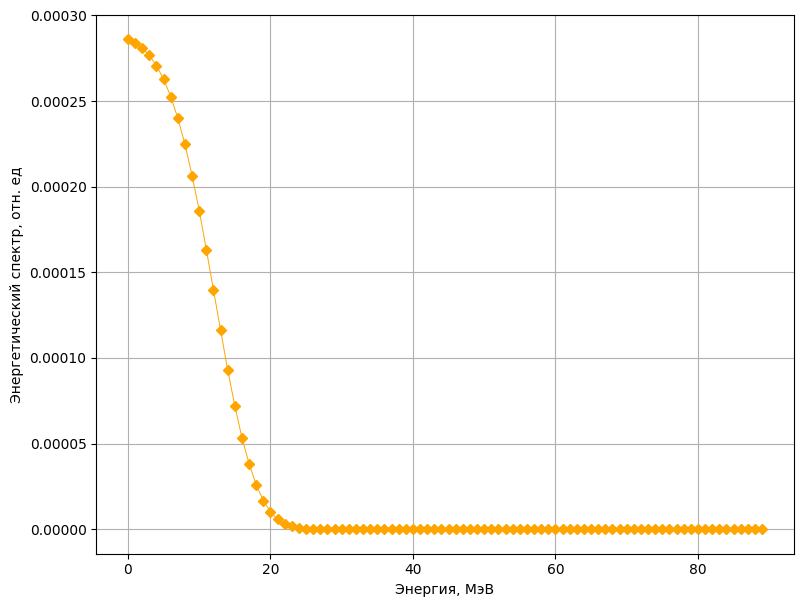

In [20]:
fig, ax = plt.subplots(figsize=(9, 7))

ax.plot(range(90), spectrums_signals[0][0], ls='-', marker='D', lw='0.7', ms=5, color='orange')

# настройки графика
ax.set_xlabel('Энергия, МэВ', fontsize=10)
ax.set_ylabel('Энергетический спектр, отн. ед', fontsize=10)
ax.tick_params(axis='both', labelsize=10)
# ax.set_xscale('log')
# ax.set_yscale('log')
# ax.set_xlim(1.e-5, 0.3e-4)
# ax.set_ylim(1e-7, 1.2)
ax.grid(True)

Скрипт

In [21]:
SP, DEV = [], []

for j in range(len(brems_e)):
    sp, dev = deconvolution_one_spectrum(brems_e[j], spectrums_signals[j])
    SP.append(sp)
    DEV.append(dev)
    print(f'ВЫПОЛНЕНО {j+1} из {len(brems_e)}')

(0), время: 0.0 секунд
(1), время: 5.90537 секунд
(2), время: 12.47002 секунд
(3), время: 19.00752 секунд
(4), время: 25.21242 секунд
(5), время: 31.68614 секунд
(6), время: 37.66613 секунд
(7), время: 44.50605 секунд
(8), время: 52.45601 секунд
(9), время: 59.46517 секунд
(10), время: 67.1393 секунд
(11), время: 76.67315 секунд
(12), время: 85.78896 секунд
(13), время: 94.49317 секунд
(14), время: 102.57855 секунд
(15), время: 110.39386 секунд
(16), время: 119.40877 секунд
(17), время: 128.52205 секунд
(18), время: 137.89362 секунд
(19), время: 147.13916 секунд
(20), время: 156.06895 секунд
(21), время: 164.82363 секунд
(22), время: 172.88575 секунд
(23), время: 179.85908 секунд
(24), время: 187.57385 секунд
(25), время: 196.88418 секунд
(26), время: 206.29334 секунд
(27), время: 214.81693 секунд
(28), время: 222.74791 секунд
(29), время: 231.4346 секунд
(30), время: 240.96453 секунд
(31), время: 248.93947 секунд
(32), время: 256.85495 секунд
(33), время: 265.26449 секунд
(34), время:

(74), время: 630.79021 секунд
(75), время: 639.1696 секунд
(76), время: 648.36266 секунд
(77), время: 657.26842 секунд
(78), время: 665.45931 секунд
(79), время: 674.08147 секунд
(80), время: 682.55583 секунд
(81), время: 691.25105 секунд
(82), время: 699.97288 секунд
(83), время: 708.67686 секунд
(84), время: 717.24276 секунд
(85), время: 725.37566 секунд
(86), время: 733.83081 секунд
(87), время: 742.1093 секунд
(88), время: 749.44808 секунд
(89), время: 757.59595 секунд
(90), время: 765.56611 секунд
(91), время: 774.00467 секунд
(92), время: 782.59951 секунд
(93), время: 791.24607 секунд
(94), время: 799.96388 секунд
(95), время: 808.50723 секунд
(96), время: 817.10323 секунд
(97), время: 825.81112 секунд
(98), время: 834.3651 секунд
(99), время: 842.89614 секунд
(100), время: 851.04797 секунд
ВЫПОЛНЕНО 3 из 50
(0), время: 0.0 секунд
(1), время: 8.69514 секунд
(2), время: 17.87064 секунд
(3), время: 27.08441 секунд
(4), время: 36.59721 секунд
(5), время: 44.87131 секунд
(6), время: 

(46), время: 399.21917 секунд
(47), время: 408.37039 секунд
(48), время: 417.8956 секунд
(49), время: 426.62334 секунд
(50), время: 435.37358 секунд
(51), время: 443.50486 секунд
(52), время: 451.64589 секунд
(53), время: 459.80327 секунд
(54), время: 468.48851 секунд
(55), время: 477.17547 секунд
(56), время: 486.29046 секунд
(57), время: 494.63603 секунд
(58), время: 503.63789 секунд
(59), время: 511.84688 секунд
(60), время: 520.12325 секунд
(61), время: 528.41325 секунд
(62), время: 538.22671 секунд
(63), время: 547.69189 секунд
(64), время: 556.29117 секунд
(65), время: 565.726 секунд
(66), время: 574.48033 секунд
(67), время: 583.77423 секунд
(68), время: 593.15827 секунд
(69), время: 602.12031 секунд
(70), время: 611.26531 секунд
(71), время: 620.49528 секунд
(72), время: 629.65796 секунд
(73), время: 637.8889 секунд
(74), время: 647.03685 секунд
(75), время: 656.13928 секунд
(76), время: 664.96739 секунд
(77), время: 673.34823 секунд
(78), время: 682.56689 секунд
(79), время: 6

(19), время: 165.71304 секунд
(20), время: 173.93183 секунд
(21), время: 182.2851 секунд
(22), время: 190.41443 секунд
(23), время: 197.88935 секунд
(24), время: 205.4452 секунд
(25), время: 213.89933 секунд
(26), время: 223.40074 секунд
(27), время: 232.76275 секунд
(28), время: 242.06631 секунд
(29), время: 251.59642 секунд
(30), время: 260.11547 секунд
(31), время: 268.8844 секунд
(32), время: 277.67158 секунд
(33), время: 286.17112 секунд
(34), время: 295.23839 секунд
(35), время: 304.48106 секунд
(36), время: 313.3004 секунд
(37), время: 321.79091 секунд
(38), время: 330.46594 секунд
(39), время: 338.89471 секунд
(40), время: 348.1181 секунд
(41), время: 356.6026 секунд
(42), время: 364.74361 секунд
(43), время: 373.25321 секунд
(44), время: 382.28104 секунд
(45), время: 390.58606 секунд
(46), время: 399.05493 секунд
(47), время: 407.74383 секунд
(48), время: 416.55588 секунд
(49), время: 424.02815 секунд
(50), время: 432.8997 секунд
(51), время: 442.34652 секунд
(52), время: 451.

(92), время: 815.8719 секунд
(93), время: 823.98939 секунд
(94), время: 831.82305 секунд
(95), время: 840.76589 секунд
(96), время: 848.52588 секунд
(97), время: 856.34356 секунд
(98), время: 865.20446 секунд
(99), время: 873.34488 секунд
(100), время: 882.98919 секунд
ВЫПОЛНЕНО 11 из 50
(0), время: 0.0 секунд
(1), время: 9.04366 секунд
(2), время: 17.74928 секунд
(3), время: 26.98583 секунд
(4), время: 35.83749 секунд
(5), время: 44.74147 секунд
(6), время: 53.93249 секунд
(7), время: 62.43381 секунд
(8), время: 71.347 секунд
(9), время: 80.32105 секунд
(10), время: 89.35083 секунд
(11), время: 97.46736 секунд
(12), время: 106.00536 секунд
(13), время: 116.03563 секунд
(14), время: 123.60468 секунд
(15), время: 131.62141 секунд
(16), время: 139.01207 секунд
(17), время: 147.66756 секунд
(18), время: 156.00144 секунд
(19), время: 164.30989 секунд
(20), время: 172.67481 секунд
(21), время: 181.22842 секунд
(22), время: 189.66907 секунд
(23), время: 197.83925 секунд
(24), время: 206.5519

(64), время: 560.76103 секунд
(65), время: 569.57669 секунд
(66), время: 578.55857 секунд
(67), время: 587.9204 секунд
(68), время: 597.31894 секунд
(69), время: 606.51477 секунд
(70), время: 616.21594 секунд
(71), время: 624.64458 секунд
(72), время: 632.69991 секунд
(73), время: 641.17311 секунд
(74), время: 649.0435 секунд
(75), время: 658.55242 секунд
(76), время: 667.12836 секунд
(77), время: 675.89114 секунд
(78), время: 684.65058 секунд
(79), время: 693.20276 секунд
(80), время: 701.85528 секунд
(81), время: 710.3175 секунд
(82), время: 718.21006 секунд
(83), время: 726.58567 секунд
(84), время: 735.87912 секунд
(85), время: 744.57755 секунд
(86), время: 752.1611 секунд
(87), время: 760.99893 секунд
(88), время: 769.84168 секунд
(89), время: 777.31646 секунд
(90), время: 784.71473 секунд
(91), время: 790.93639 секунд
(92), время: 798.61377 секунд
(93), время: 807.44641 секунд
(94), время: 816.85193 секунд
(95), время: 826.22691 секунд
(96), время: 835.17327 секунд
(97), время: 8

(36), время: 307.09466 секунд
(37), время: 317.43209 секунд
(38), время: 327.32634 секунд
(39), время: 335.54636 секунд
(40), время: 345.15171 секунд
(41), время: 354.04957 секунд
(42), время: 362.78471 секунд
(43), время: 372.59762 секунд
(44), время: 381.41668 секунд
(45), время: 390.74865 секунд
(46), время: 400.22703 секунд
(47), время: 409.24675 секунд
(48), время: 418.2934 секунд
(49), время: 426.90169 секунд
(50), время: 435.93852 секунд
(51), время: 444.19878 секунд
(52), время: 452.41414 секунд
(53), время: 461.03918 секунд
(54), время: 469.78882 секунд
(55), время: 478.89346 секунд
(56), время: 488.36373 секунд
(57), время: 496.21863 секунд
(58), время: 505.00925 секунд
(59), время: 514.29103 секунд
(60), время: 523.73601 секунд
(61), время: 533.21157 секунд
(62), время: 542.6108 секунд
(63), время: 551.9728 секунд
(64), время: 560.73725 секунд
(65), время: 569.63931 секунд
(66), время: 578.43504 секунд
(67), время: 587.98337 секунд
(68), время: 596.99234 секунд
(69), время: 

(8), время: 67.99574 секунд
(9), время: 76.51132 секунд
(10), время: 84.01682 секунд
(11), время: 91.6765 секунд
(12), время: 99.31408 секунд
(13), время: 107.11157 секунд
(14), время: 115.75421 секунд
(15), время: 124.46808 секунд
(16), время: 133.18848 секунд
(17), время: 142.07993 секунд
(18), время: 150.61859 секунд
(19), время: 158.63449 секунд
(20), время: 166.89735 секунд
(21), время: 176.46282 секунд
(22), время: 184.35187 секунд
(23), время: 193.31846 секунд
(24), время: 202.26136 секунд
(25), время: 211.3515 секунд
(26), время: 219.33582 секунд
(27), время: 228.54502 секунд
(28), время: 236.92949 секунд
(29), время: 244.46075 секунд
(30), время: 252.32478 секунд
(31), время: 260.8871 секунд
(32), время: 269.00105 секунд
(33), время: 278.54975 секунд
(34), время: 287.76793 секунд
(35), время: 296.58906 секунд
(36), время: 305.25117 секунд
(37), время: 313.75334 секунд
(38), время: 322.9856 секунд
(39), время: 331.21497 секунд
(40), время: 338.61092 секунд
(41), время: 347.4168

(82), время: 729.34883 секунд
(83), время: 738.48609 секунд
(84), время: 747.04705 секунд
(85), время: 754.68401 секунд
(86), время: 763.2369 секунд
(87), время: 772.56182 секунд
(88), время: 780.38888 секунд
(89), время: 788.54607 секунд
(90), время: 796.73821 секунд
(91), время: 805.9659 секунд
(92), время: 814.02208 секунд
(93), время: 821.71207 секунд
(94), время: 830.05416 секунд
(95), время: 838.33514 секунд
(96), время: 847.13522 секунд
(97), время: 856.19911 секунд
(98), время: 864.66184 секунд
(99), время: 872.29625 секунд
(100), время: 880.4529 секунд
ВЫПОЛНЕНО 22 из 50
(0), время: 0.0 секунд
(1), время: 9.34039 секунд
(2), время: 17.63704 секунд
(3), время: 26.77944 секунд
(4), время: 34.80411 секунд
(5), время: 43.66712 секунд
(6), время: 52.86614 секунд
(7), время: 61.13989 секунд
(8), время: 69.569 секунд
(9), время: 77.81809 секунд
(10), время: 85.27687 секунд
(11), время: 93.37168 секунд
(12), время: 102.04662 секунд
(13), время: 111.41852 секунд
(14), время: 120.22365 

(54), время: 477.33303 секунд
(55), время: 487.23132 секунд
(56), время: 496.25905 секунд
(57), время: 504.1858 секунд
(58), время: 513.07782 секунд
(59), время: 521.78665 секунд
(60), время: 531.87128 секунд
(61), время: 543.53529 секунд
(62), время: 553.44746 секунд
(63), время: 561.99859 секунд
(64), время: 571.38336 секунд
(65), время: 580.11271 секунд
(66), время: 590.47364 секунд
(67), время: 600.48161 секунд
(68), время: 609.86345 секунд
(69), время: 620.02918 секунд
(70), время: 629.80618 секунд
(71), время: 638.83234 секунд
(72), время: 648.70666 секунд
(73), время: 658.13268 секунд
(74), время: 666.42039 секунд
(75), время: 674.44996 секунд
(76), время: 684.16426 секунд
(77), время: 693.75539 секунд
(78), время: 702.37974 секунд
(79), время: 710.96847 секунд
(80), время: 719.56993 секунд
(81), время: 729.82605 секунд
(82), время: 738.58567 секунд
(83), время: 747.1283 секунд
(84), время: 756.18602 секунд
(85), время: 764.91814 секунд
(86), время: 772.91526 секунд
(87), время:

(26), время: 226.56265 секунд
(27), время: 236.01452 секунд
(28), время: 245.20205 секунд
(29), время: 254.04622 секунд
(30), время: 263.02509 секунд
(31), время: 272.54854 секунд
(32), время: 282.34292 секунд
(33), время: 291.5885 секунд
(34), время: 301.11211 секунд
(35), время: 310.24932 секунд
(36), время: 318.89319 секунд
(37), время: 327.2191 секунд
(38), время: 335.94324 секунд
(39), время: 345.89606 секунд
(40), время: 355.22513 секунд
(41), время: 365.29955 секунд
(42), время: 374.1145 секунд
(43), время: 383.02797 секунд
(44), время: 391.87683 секунд
(45), время: 401.14907 секунд
(46), время: 410.15278 секунд
(47), время: 419.01064 секунд
(48), время: 428.11328 секунд
(49), время: 438.42835 секунд
(50), время: 447.21463 секунд
(51), время: 455.72752 секунд
(52), время: 463.54068 секунд
(53), время: 472.61189 секунд
(54), время: 480.84802 секунд
(55), время: 490.26768 секунд
(56), время: 498.72358 секунд
(57), время: 508.54288 секунд
(58), время: 518.34868 секунд
(59), время: 

(99), время: 879.70576 секунд
(100), время: 888.87815 секунд
ВЫПОЛНЕНО 30 из 50
(0), время: 0.0 секунд
(1), время: 8.96649 секунд
(2), время: 18.23786 секунд
(3), время: 26.2295 секунд
(4), время: 35.42296 секунд
(5), время: 44.36784 секунд
(6), время: 53.74833 секунд
(7), время: 62.28854 секунд
(8), время: 70.90022 секунд
(9), время: 79.61516 секунд
(10), время: 89.01497 секунд
(11), время: 97.30524 секунд
(12), время: 105.47902 секунд
(13), время: 114.61519 секунд
(14), время: 123.79267 секунд
(15), время: 132.3602 секунд
(16), время: 141.66945 секунд
(17), время: 150.16771 секунд
(18), время: 158.09845 секунд
(19), время: 166.15877 секунд
(20), время: 175.15871 секунд
(21), время: 183.75959 секунд
(22), время: 192.41886 секунд
(23), время: 201.17064 секунд
(24), время: 210.4931 секунд
(25), время: 219.47753 секунд
(26), время: 227.48494 секунд
(27), время: 236.68749 секунд
(28), время: 246.29123 секунд
(29), время: 254.95667 секунд
(30), время: 263.71225 секунд
(31), время: 273.0135

(72), время: 643.31505 секунд
(73), время: 651.95603 секунд
(74), время: 661.1336 секунд
(75), время: 669.98399 секунд
(76), время: 678.89897 секунд
(77), время: 688.40619 секунд
(78), время: 697.16052 секунд
(79), время: 705.78102 секунд
(80), время: 714.85623 секунд
(81), время: 723.84729 секунд
(82), время: 732.64702 секунд
(83), время: 741.7802 секунд
(84), время: 750.581 секунд
(85), время: 759.62715 секунд
(86), время: 768.24197 секунд
(87), время: 776.45658 секунд
(88), время: 784.8982 секунд
(89), время: 793.64694 секунд
(90), время: 802.83491 секунд
(91), время: 811.64087 секунд
(92), время: 819.9125 секунд
(93), время: 828.9502 секунд
(94), время: 836.5292 секунд
(95), время: 845.10733 секунд
(96), время: 854.32433 секунд
(97), время: 863.28369 секунд
(98), время: 872.37408 секунд
(99), время: 881.27054 секунд
(100), время: 889.51233 секунд
ВЫПОЛНЕНО 33 из 50
(0), время: 0.0 секунд
(1), время: 8.20737 секунд
(2), время: 16.71385 секунд
(3), время: 25.32197 секунд
(4), время: 

(45), время: 395.62146 секунд
(46), время: 404.06993 секунд
(47), время: 413.78566 секунд
(48), время: 421.86795 секунд
(49), время: 430.42783 секунд
(50), время: 439.08576 секунд
(51), время: 448.73879 секунд
(52), время: 458.3627 секунд
(53), время: 467.31045 секунд
(54), время: 476.31002 секунд
(55), время: 486.03786 секунд
(56), время: 494.11364 секунд
(57), время: 502.44812 секунд
(58), время: 511.57461 секунд
(59), время: 521.97977 секунд
(60), время: 531.52401 секунд
(61), время: 540.67421 секунд
(62), время: 550.24959 секунд
(63), время: 559.5152 секунд
(64), время: 569.43327 секунд
(65), время: 578.63715 секунд
(66), время: 587.90636 секунд
(67), время: 596.58628 секунд
(68), время: 606.81436 секунд
(69), время: 615.77542 секунд
(70), время: 625.58906 секунд
(71), время: 635.25486 секунд
(72), время: 644.60293 секунд
(73), время: 653.95205 секунд
(74), время: 663.63234 секунд
(75), время: 672.27664 секунд
(76), время: 681.00894 секунд
(77), время: 690.1671 секунд
(78), время: 

(17), время: 146.49358 секунд
(18), время: 155.12002 секунд
(19), время: 163.12113 секунд
(20), время: 172.08784 секунд
(21), время: 179.95505 секунд
(22), время: 188.859 секунд
(23), время: 196.122 секунд
(24), время: 204.43469 секунд
(25), время: 213.28753 секунд
(26), время: 222.81703 секунд
(27), время: 232.82431 секунд
(28), время: 240.95025 секунд
(29), время: 249.80571 секунд
(30), время: 259.48389 секунд
(31), время: 268.30027 секунд
(32), время: 277.20721 секунд
(33), время: 286.45941 секунд
(34), время: 296.26974 секунд
(35), время: 305.17765 секунд
(36), время: 314.40584 секунд
(37), время: 323.05125 секунд
(38), время: 331.86274 секунд
(39), время: 341.38683 секунд
(40), время: 349.07612 секунд
(41), время: 357.24698 секунд
(42), время: 365.40042 секунд
(43), время: 373.55016 секунд
(44), время: 382.25901 секунд
(45), время: 390.82347 секунд
(46), время: 399.00503 секунд
(47), время: 406.92817 секунд
(48), время: 416.63721 секунд
(49), время: 425.20386 секунд
(50), время: 4

(90), время: 802.26261 секунд
(91), время: 810.97619 секунд
(92), время: 820.00223 секунд
(93), время: 830.0169 секунд
(94), время: 838.33252 секунд
(95), время: 846.28082 секунд
(96), время: 854.49114 секунд
(97), время: 863.50562 секунд
(98), время: 871.92995 секунд
(99), время: 879.44253 секунд
(100), время: 887.49151 секунд
ВЫПОЛНЕНО 41 из 50
(0), время: 0.0 секунд
(1), время: 8.44236 секунд
(2), время: 17.252 секунд
(3), время: 26.72974 секунд
(4), время: 35.78627 секунд
(5), время: 45.27146 секунд
(6), время: 53.6399 секунд
(7), время: 61.96367 секунд
(8), время: 70.70559 секунд
(9), время: 79.57815 секунд
(10), время: 87.99598 секунд
(11), время: 97.07515 секунд
(12), время: 104.79981 секунд
(13), время: 112.76069 секунд
(14), время: 120.92243 секунд
(15), время: 128.39462 секунд
(16), время: 136.94119 секунд
(17), время: 145.67139 секунд
(18), время: 154.03252 секунд
(19), время: 162.83278 секунд
(20), время: 170.45381 секунд
(21), время: 178.83793 секунд
(22), время: 187.67376

(62), время: 549.95682 секунд
(63), время: 559.68911 секунд
(64), время: 568.52393 секунд
(65), время: 577.82231 секунд
(66), время: 586.92045 секунд
(67), время: 596.39861 секунд
(68), время: 605.67902 секунд
(69), время: 614.82731 секунд
(70), время: 625.60831 секунд
(71), время: 634.03263 секунд
(72), время: 642.60961 секунд
(73), время: 651.08769 секунд
(74), время: 659.65644 секунд
(75), время: 668.62897 секунд
(76), время: 678.62445 секунд
(77), время: 687.40819 секунд
(78), время: 696.63957 секунд
(79), время: 705.63984 секунд
(80), время: 714.84531 секунд
(81), время: 724.48322 секунд
(82), время: 732.98271 секунд
(83), время: 743.15162 секунд
(84), время: 751.96293 секунд
(85), время: 761.33888 секунд
(86), время: 770.40047 секунд
(87), время: 778.21812 секунд
(88), время: 786.79219 секунд
(89), время: 794.59162 секунд
(90), время: 803.13342 секунд
(91), время: 811.84842 секунд
(92), время: 820.72618 секунд
(93), время: 829.17688 секунд
(94), время: 837.76172 секунд
(95), врем

(34), время: 291.16877 секунд
(35), время: 300.39519 секунд
(36), время: 310.52897 секунд
(37), время: 319.29934 секунд
(38), время: 327.15965 секунд
(39), время: 336.18687 секунд
(40), время: 344.63175 секунд
(41), время: 354.5976 секунд
(42), время: 362.27724 секунд
(43), время: 371.07241 секунд
(44), время: 379.25913 секунд
(45), время: 388.12418 секунд
(46), время: 397.25563 секунд
(47), время: 405.92972 секунд
(48), время: 414.69045 секунд
(49), время: 423.89641 секунд
(50), время: 433.3867 секунд
(51), время: 442.66305 секунд
(52), время: 451.02724 секунд
(53), время: 459.28619 секунд
(54), время: 468.93765 секунд
(55), время: 478.57618 секунд
(56), время: 487.26224 секунд
(57), время: 495.89377 секунд
(58), время: 505.46009 секунд
(59), время: 514.79866 секунд
(60), время: 524.50619 секунд
(61), время: 533.64811 секунд
(62), время: 542.82704 секунд
(63), время: 550.80041 секунд
(64), время: 559.29056 секунд
(65), время: 568.47378 секунд
(66), время: 577.99521 секунд
(67), время:

(6), время: 29.45368 секунд
(7), время: 34.04296 секунд
(8), время: 38.70558 секунд
(9), время: 43.01371 секунд
(10), время: 47.72735 секунд
(11), время: 52.66737 секунд
(12), время: 57.18108 секунд
(13), время: 61.72757 секунд
(14), время: 66.71904 секунд
(15), время: 71.61057 секунд
(16), время: 76.5046 секунд
(17), время: 81.04904 секунд
(18), время: 85.9907 секунд
(19), время: 90.8465 секунд
(20), время: 95.2679 секунд
(21), время: 100.37484 секунд
(22), время: 104.6299 секунд
(23), время: 109.29855 секунд
(24), время: 113.66071 секунд
(25), время: 118.29061 секунд
(26), время: 123.0461 секунд
(27), время: 127.87243 секунд
(28), время: 133.25556 секунд
(29), время: 138.2992 секунд
(30), время: 143.17465 секунд
(31), время: 147.98817 секунд
(32), время: 153.18054 секунд
(33), время: 157.88104 секунд
(34), время: 163.04085 секунд
(35), время: 168.27789 секунд
(36), время: 172.70713 секунд
(37), время: 177.06501 секунд
(38), время: 181.63317 секунд
(39), время: 186.8511 секунд
(40), в

Сохранение данных

In [22]:
np.save(f'K_{m}_SP.npy', SP)
np.save(f'K_{m}_DEV.npy', DEV)

Загрузка данных

Построение

In [23]:
from mpl_toolkits.mplot3d import Axes3D

In [24]:
D = np.array(DEV)
X,Y = np.meshgrid(edge_max_values, beams_energyes)
X, Ylog = np.meshgrid(edge_max_values, np.log10(beams_energyes))
Xlog, Ylog = np.meshgrid(np.log10(edge_max_values), np.log10(beams_energyes))

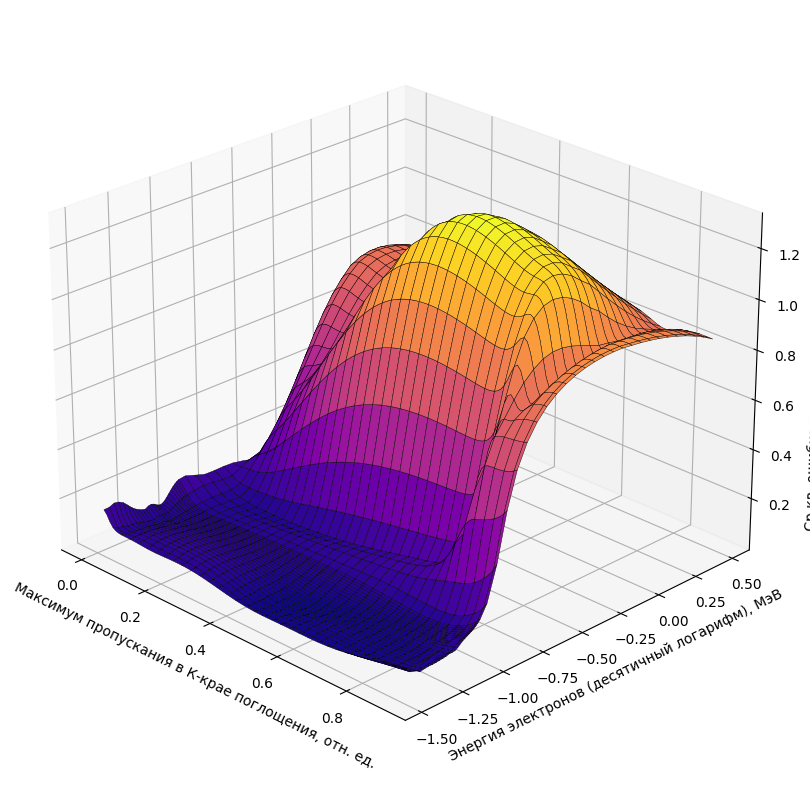

In [25]:
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': '3d'})
ax.plot_surface(X, Ylog, D, cmap='plasma', linewidth=0.3, edgecolors='k', shade=True)

ax.set_xlabel('Максимум пропускания в К-крае поглощения, отн. ед.')
ax.set_ylabel('Энергия электронов (десятичный логарифм), МэВ')
ax.set_zlabel('Ср.кв. ошибка восстановления, отн. ед.')
fig.tight_layout()

# угол зрения (линейный)
# ax.view_init(elev=20, azim=-135)

# угол зрения (логарифм)
ax.view_init(elev=25, azim=-45)

# fig.savefig('К_фильтры_3D.jpg', bbox_inches='tight')

Контурная карта

In [26]:
linspace4 = np.geomspace(1e-2, 0.3, 20)
linspace5 = np.linspace(0.31, 1.4, 10)

In [27]:
c_map_levels = []
c_map_levels.extend(linspace4)
c_map_levels.extend(linspace5)

Text(0, 0.5, 'Энергия электронов, МэВ')

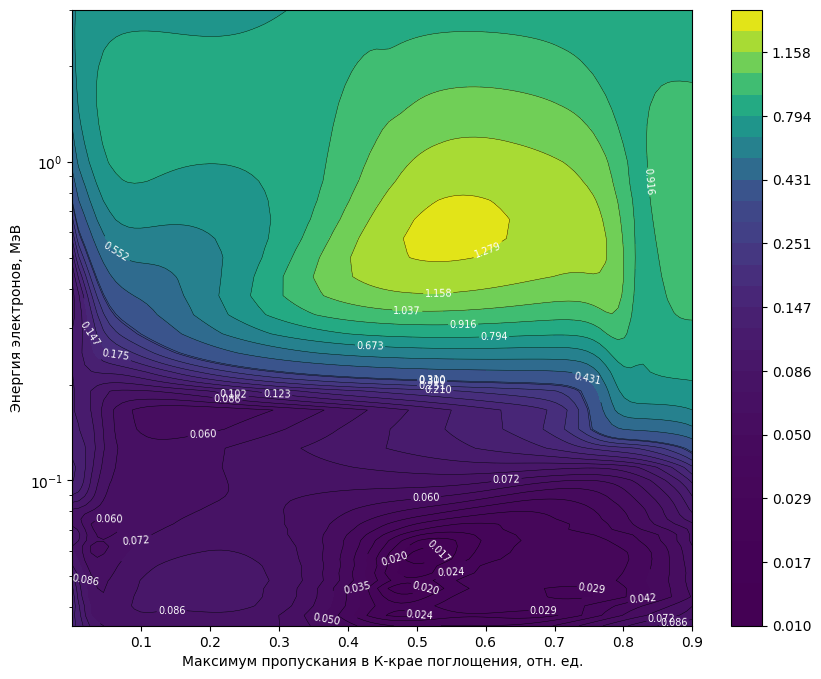

In [28]:
fig, ax = plt.subplots(figsize=(10, 8))

c_map = ax.contourf(X, Y, D, levels=c_map_levels)
borders = ax.contour(X, Y, D, colors='k', levels=c_map_levels, linewidths=0.3)
ax.clabel(borders, fontsize=7, colors='w')
fig.colorbar(c_map)
ax.set_yscale('log')

ax.set_xlabel('Максимум пропускания в К-крае поглощения, отн. ед.')
ax.set_ylabel('Энергия электронов, МэВ')

# fig.savefig('К_фильтры_контурная_карта.jpg', bbox_inches='tight')

Зависимость минимальной ошибки восстановления от граничной энерии спектра

In [29]:
minimal_deviations = []

for i,val in enumerate(beams_energyes):
    min_value = min(DEV[i])
    minimal_deviations.append(min_value)

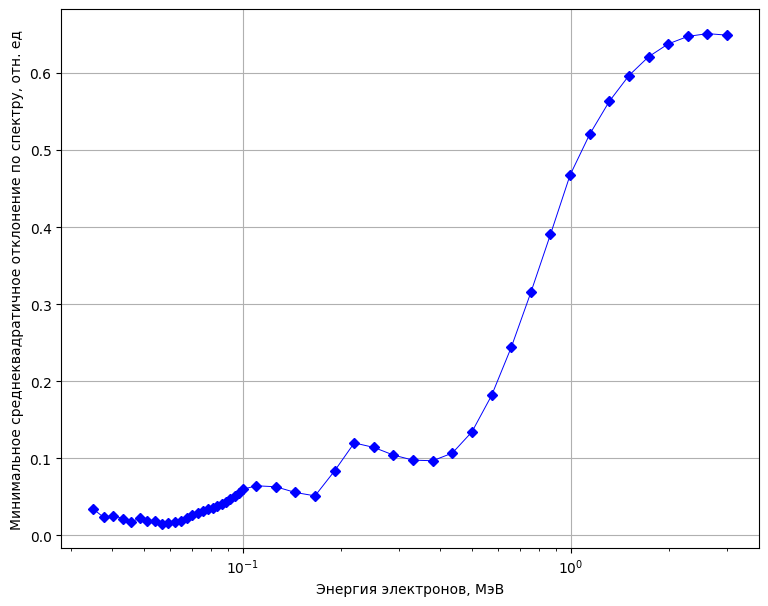

In [30]:
fig, ax = plt.subplots(figsize=(9, 7))

ax.plot(beams_energyes, minimal_deviations, ls='-', marker='D', lw='0.7', ms=5, color='blue')

# настройки графика
ax.set_xlabel('Энергия электронов, МэВ', fontsize=10)
ax.set_ylabel('Минимальное среднеквадратичное отклонение по спектру, отн. ед', fontsize=10)
ax.tick_params(axis='both', labelsize=10)
ax.set_xscale('log')
# ax.set_yscale('log')
ax.grid(True)

# fig.savefig('К_фильтры_минимум_ошибки_восстановления_от_энергии_электронов.jpg', bbox_inches='tight')

In [31]:
np.save(f'K_{m}_MIN.npy', minimal_deviations)